In [ ]:
!pip install PyPDF2
!pip install transformers
!pip install pandas
!pip install matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 3.3 MB/s eta 0:00:00


In [ ]:
from google.colab import files

uploaded = files.upload()


Saving Sample CV.docx.pdf to Sample CV.docx.pdf


In [ ]:
import PyPDF2

def extract_text_from_pdf(pdf_path):
    with open(pdf_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        text = ''
        for page in range(len(reader.pages)):
            text += reader.pages[page].extract_text()
    return text

#
for filename in uploaded.keys():
    text = extract_text_from_pdf(filename)
    print(f"Extracted text from {filename}:\n{text}\n")

Extracted text from Sample CV.docx.pdf:
Parth
Sharma
|
parths5031@gmail.com
|
(
972)-776-6566
|
SUMMARY:
●9+yearsoftechnicalexperienceinimplementation,customization,integrationandsupportofbusinessapplicationSystems.
●Demonstratedabilityforproblemsolvingandcollaboratingincross-functionalteams,deliveringprojectsontimeandwithinbudget.
●Hands-onexperiencewithsoftwaredevelopmentapproachesAgile(Scrum,Kanban)andWaterfallmethodologies.
●Expertiseinthedevelopmentanddeploymentofmulti-tieredweb-basedenterpriseapplicationsusingJava/J2EEtechnologieslikeServlets,JSP,Hibernate,Spring,JDBC,JSP,JavaBeans,andwebservices(SOAPandREST).  
●ExperiencedintestingdistributedsystemsandmessagebrokerslikeKafkaandRabbitMQ.
●Strongexperienceinthedesign/developmentofwebapplicationsusingJava,JSP,JSTL,J2EE,Servlets,JMS,MVCFramework,WebServices,XML,XSD,JSONandJAXB.  
●Strongexperiencewithcloudplatforms,particularlyAWS(EC2,S3,Lambda).
●ProficientinSpringArchitectureandSpringRelatedTechnologies:SpringDI/MVC/SpringJDBC/AO

In [ ]:
from transformers import pipeline


ner_pipeline = pipeline("ner", grouped_entities=True)


CATEGORY_KEYWORDS = {
    'Education': ['bachelor', 'master', 'phd', 'school', 'university', 'degree', 'education'],
    'Work Experience': ['experience', 'work', 'company', 'internship', 'job', 'employment'],
    'Skills': ['skills', 'languages', 'proficient', 'frameworks', 'tools'],
    'Certifications': ['certification', 'certified', 'license', 'training'],
    'Projects': ['project', 'developed', 'implemented'],
    'Awards': ['award', 'honor', 'recognition'],
    'Publications': ['publication', 'research', 'article', 'paper'],
    'Contact Information': ['phone', 'email', 'address'],
    'Objective': ['objective', 'summary', 'career goal'],
    'Languages': ['languages', 'bilingual', 'fluent'],
    'Interests': ['interests', 'hobbies', 'activities']
}

def categorize_text_with_ner(text, category_keywords):
    categorized_data = {category: [] for category in category_keywords}

    lines = text.split('\n')

    for line in lines:
        line_lower = line.lower()


        for category, keywords in category_keywords.items():
            if any(keyword in line_lower for keyword in keywords):
                categorized_data[category].append(line)


        entities = ner_pipeline(line)
        for entity in entities:
            if entity['entity_group'] == 'ORG':
                categorized_data['Work Experience'].append(line)
            elif entity['entity_group'] == 'PER':
                categorized_data['Contact Information'].append(line)

    return categorized_data

#
for filename in uploaded.keys():
    text = extract_text_from_pdf(filename)
    categorized_data = categorize_text_with_ner(text, CATEGORY_KEYWORDS)
    print(f"Categorized data for {filename}:\n{categorized_data}\n")


No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/token_classification.py:168: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="simple"` instead.
  warnings.warn(


Categorized data for Sample CV.docx.pdf:
{'Education': ['EDUCATION:', '●BachelorofEngineeringinComputerEngineering,GujaratTechnologicalUniversity,2010–2014'], 'Work Experience': ['●9+yearsoftechnicalexperienceinimplementation,customization,integrationandsupportofbusinessapplicationSystems.', '●Hands-onexperiencewithsoftwaredevelopmentapproachesAgile(Scrum,Kanban)andWaterfallmethodologies.', '●Hands-onexperiencewithsoftwaredevelopmentapproachesAgile(Scrum,Kanban)andWaterfallmethodologies.', '●Hands-onexperiencewithsoftwaredevelopmentapproachesAgile(Scrum,Kanban)andWaterfallmethodologies.', '●Expertiseinthedevelopmentanddeploymentofmulti-tieredweb-basedenterpriseapplicationsusingJava/J2EEtechnologieslikeServlets,JSP,Hibernate,Spring,JDBC,JSP,JavaBeans,andwebservices(SOAPandREST).  ', '●ExperiencedintestingdistributedsystemsandmessagebrokerslikeKafkaandRabbitMQ.', '●ExperiencedintestingdistributedsystemsandmessagebrokerslikeKafkaandRabbitMQ.', '●Experiencedintestingdistributedsystemsandme

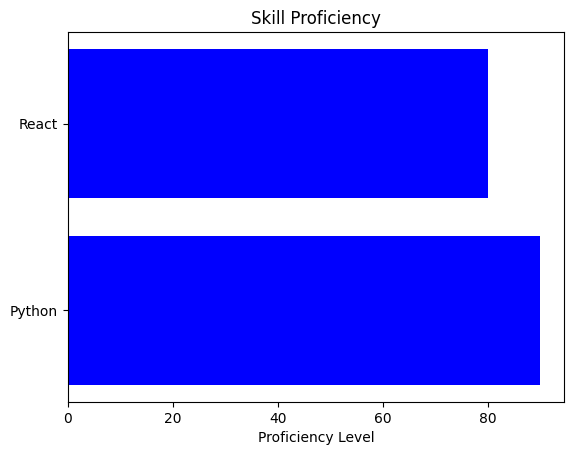

In [ ]:
import matplotlib.pyplot as plt

def plot_skill_bars(skills):
    skill_names = [skill['name'] for skill in skills]
    skill_levels = [skill['level'] for skill in skills]
    plt.barh(skill_names, skill_levels, color='blue')
    plt.xlabel('Proficiency Level')
    plt.title('Skill Proficiency')
    plt.show()


example_skills = [{'name': 'Python', 'level': 90}, {'name': 'React', 'level': 80}]
plot_skill_bars(example_skills)


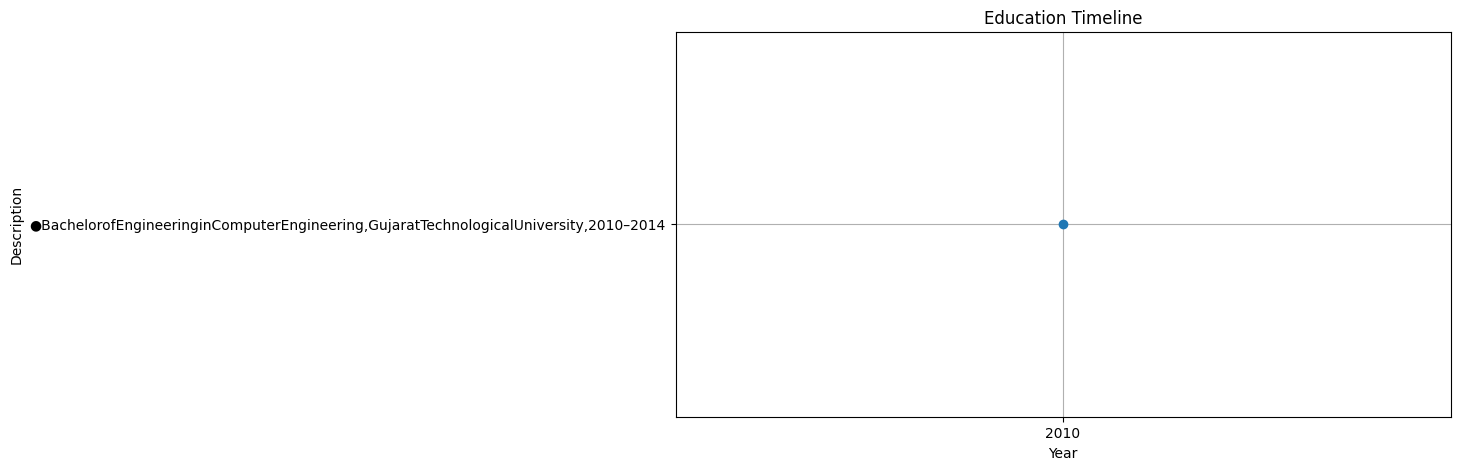

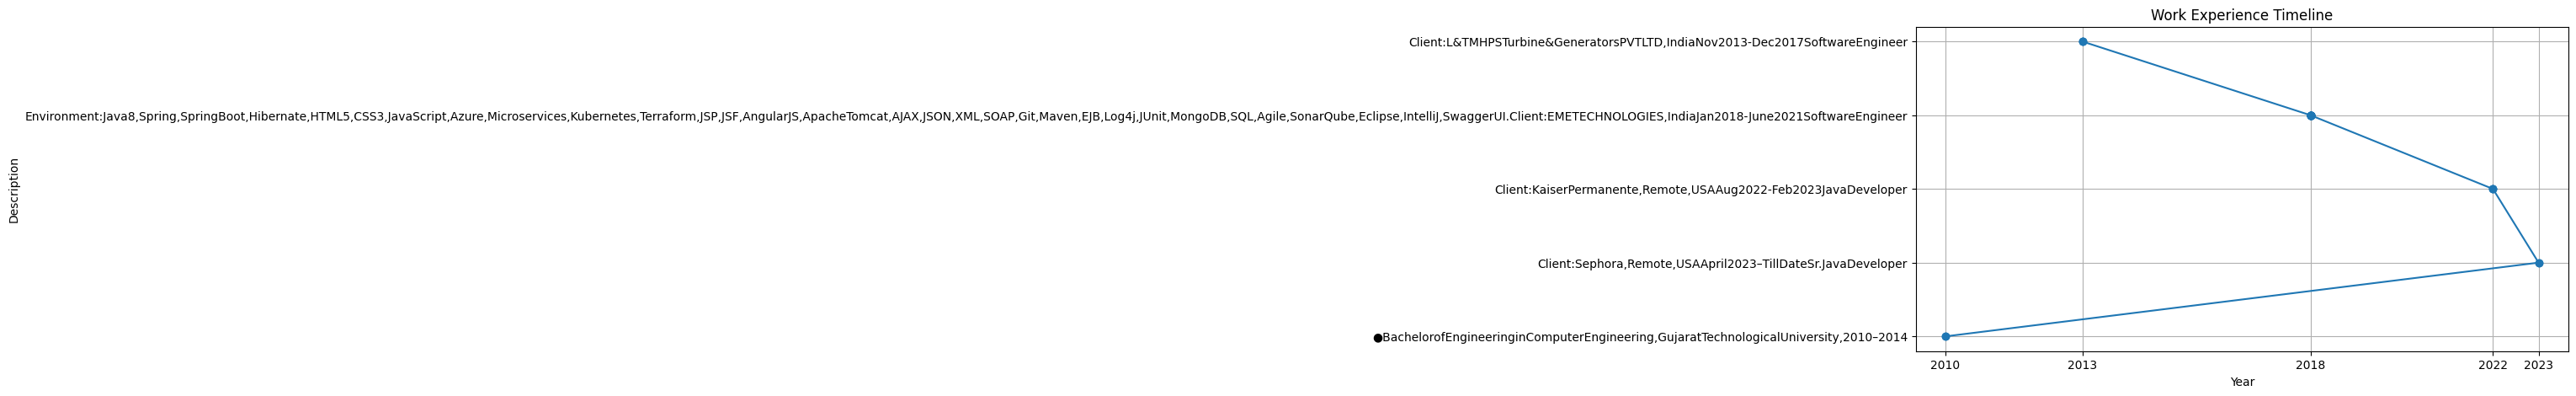

In [ ]:
import pandas as pd

def plot_timeline(category_data, title):
    df = pd.DataFrame(category_data, columns=["Description"])
    df['Year'] = df['Description'].str.extract(r'(\d{4})')
    df = df.dropna(subset=['Year'])
    df['Year'] = df['Year'].astype(int)

    plt.figure(figsize=(10, 5))
    plt.plot(df['Year'], df['Description'], marker='o')
    plt.title(f'{title} Timeline')
    plt.xlabel('Year')
    plt.ylabel('Description')
    plt.xticks(df['Year'].unique())
    plt.grid(True)
    plt.show()

# Example of timeline visualization
for category in ['Education', 'Work Experience']:
    if categorized_data[category]:
        plot_timeline(categorized_data[category], category)


Education:
['EDUCATION:', '●BachelorofEngineeringinComputerEngineering,GujaratTechnologicalUniversity,2010–2014']

Work Experience:
['●9+yearsoftechnicalexperienceinimplementation,customization,integrationandsupportofbusinessapplicationSystems.', '●Hands-onexperiencewithsoftwaredevelopmentapproachesAgile(Scrum,Kanban)andWaterfallmethodologies.', '●Hands-onexperiencewithsoftwaredevelopmentapproachesAgile(Scrum,Kanban)andWaterfallmethodologies.', '●Hands-onexperiencewithsoftwaredevelopmentapproachesAgile(Scrum,Kanban)andWaterfallmethodologies.', '●Expertiseinthedevelopmentanddeploymentofmulti-tieredweb-basedenterpriseapplicationsusingJava/J2EEtechnologieslikeServlets,JSP,Hibernate,Spring,JDBC,JSP,JavaBeans,andwebservices(SOAPandREST).  ', '●ExperiencedintestingdistributedsystemsandmessagebrokerslikeKafkaandRabbitMQ.', '●ExperiencedintestingdistributedsystemsandmessagebrokerslikeKafkaandRabbitMQ.', '●ExperiencedintestingdistributedsystemsandmessagebrokerslikeKafkaandRabbitMQ.', '●Strongex

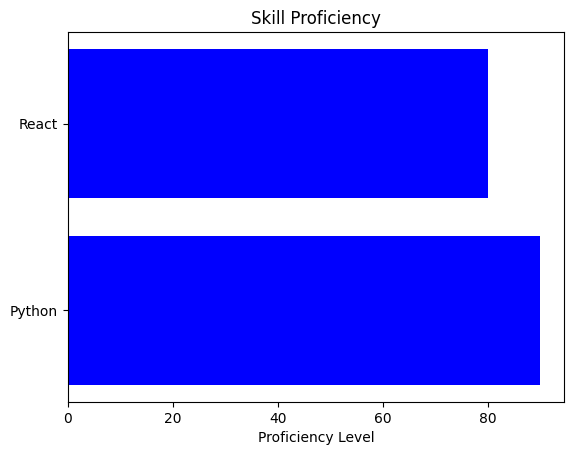

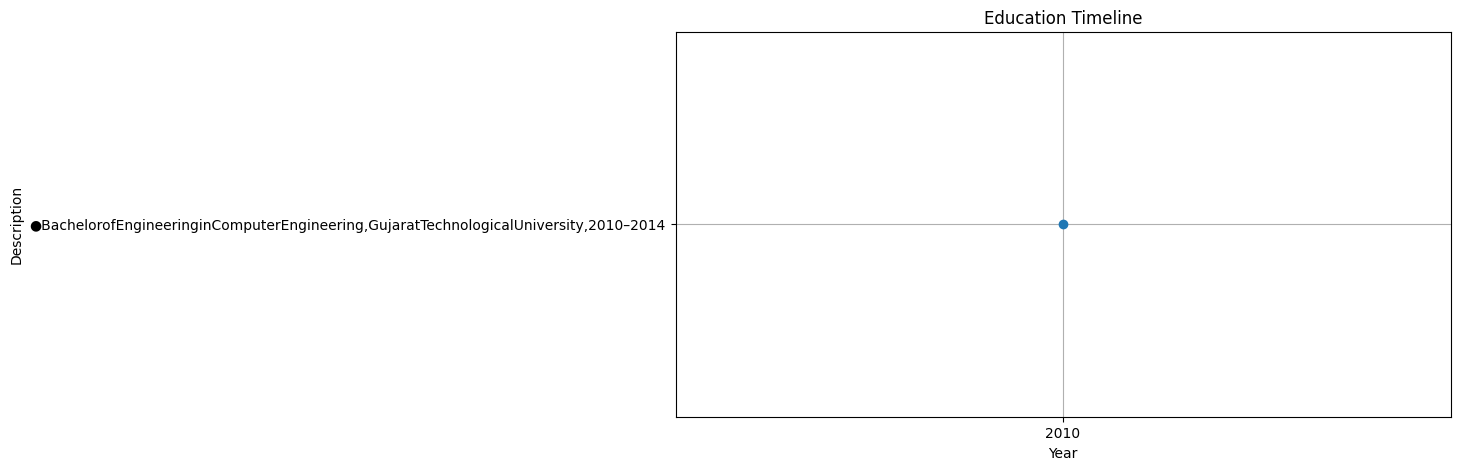

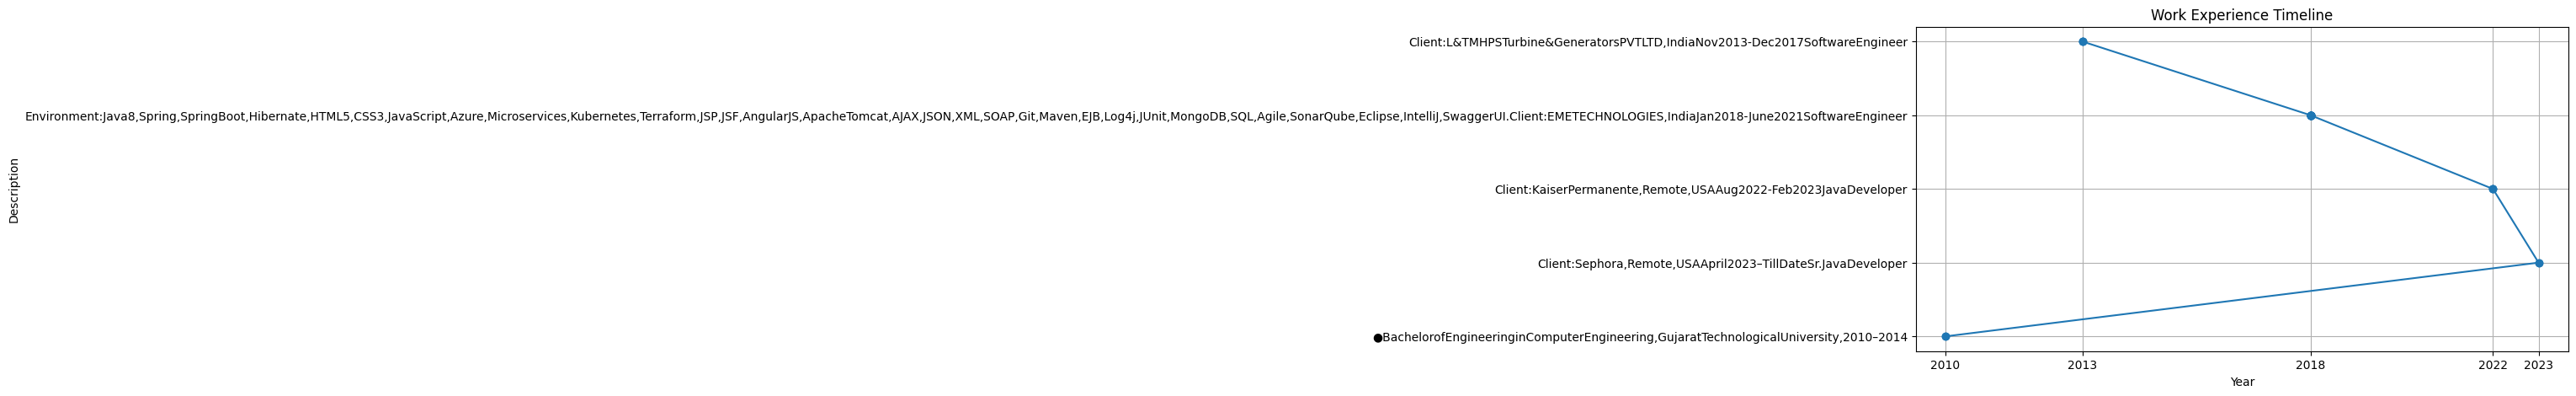

In [ ]:
for filename in uploaded.keys():

    text = extract_text_from_pdf(filename)


    categorized_data = categorize_text_with_ner(text, CATEGORY_KEYWORDS)


    for category, items in categorized_data.items():
        print(f"{category}:\n{items}\n")


    if categorized_data['Skills']:
        skills = [{'name': 'Python', 'level': 90}, {'name': 'React', 'level': 80}]  # Dummy skill data for example
        plot_skill_bars(skills)


    for category in ['Education', 'Work Experience']:
        if categorized_data[category]:
            plot_timeline(categorized_data[category], category)
